In [1]:
# Imports

In [2]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import graphviz
import time
import os
os.chdir('..')
os.getcwd()

'C:\\Users\\slin2\\Documents\\GitHub\\power_production_w207_final_project_2022'

In [3]:
from utils.utilities import load_train_test_data

In [4]:
# Load data
os.getcwd()

'C:\\Users\\slin2\\Documents\\GitHub\\power_production_w207_final_project_2022'

In [5]:
# Load data
train_df, test_df = load_train_test_data()

mae_results = {}
rmse_results = {}

In [15]:
train_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,WEATHER_SOURCE,DATE,TIME,is_daytime,yesterday_max_daily_yield,HOUR,AC_POWER_dayof,AC_POWER_daybefore
0,2020-05-16 01:45:00,4136001,LlT2YUhhzqhg5Sw,0.000000,0.000000,0.000000,2.826020e+08,25.954583,23.974197,0.000000,iq8k7ZNt4Mwm3w0,2020-05-16,01:45:00,0,9234.0,1,NaN,NaN
1,2020-05-16 15:30:00,4136001,NgDl19wMapZy17u,582.106667,570.446667,7294.266667,1.115294e+08,34.537255,42.353539,0.393412,iq8k7ZNt4Mwm3w0,2020-05-16,15:30:00,1,9475.0,15,NaN,NaN
2,2020-05-16 15:30:00,4136001,Mx2yZCDsyf6DPfv,597.557143,585.471429,5334.571429,2.466781e+06,34.537255,42.353539,0.393412,iq8k7ZNt4Mwm3w0,2020-05-16,15:30:00,1,7800.0,15,NaN,NaN
3,2020-05-16 15:30:00,4136001,LlT2YUhhzqhg5Sw,547.846667,537.066667,7085.133333,2.826091e+08,34.537255,42.353539,0.393412,iq8k7ZNt4Mwm3w0,2020-05-16,15:30:00,1,9234.0,15,NaN,NaN
4,2020-05-16 15:30:00,4136001,LYwnQax7tkwH5Cb,559.340000,548.213333,2717.400000,1.794970e+09,34.537255,42.353539,0.393412,iq8k7ZNt4Mwm3w0,2020-05-16,15:30:00,1,8458.0,15,NaN,NaN


In [7]:
test_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,WEATHER_SOURCE,DATE,TIME,is_daytime,yesterday_max_daily_yield,HOUR,AC_POWER_dayof,YDAY_DATE,AC_POWER_daybefore
0,2020-06-12 02:30:00,4136001,LYwnQax7tkwH5Cb,0.000000,0.000000,3718.000000,1.795083e+09,22.610987,22.146187,0.00000,iq8k7ZNt4Mwm3w0,2020-06-12,02:30:00,0,3718.0,2,NaN,NaN,NaN
1,2020-06-12 23:45:00,4136001,xoJJ8DcxJEcupym,0.000000,0.000000,4788.000000,2.093055e+08,23.099230,22.757666,0.00000,iq8k7ZNt4Mwm3w0,2020-06-12,23:45:00,0,3971.0,23,NaN,NaN,NaN
2,2020-06-12 07:45:00,4136001,WcxssY2VbP4hApt,267.833333,262.780000,194.800000,1.818769e+08,24.554531,27.705916,0.17587,iq8k7ZNt4Mwm3w0,2020-06-12,07:45:00,1,3947.0,7,NaN,NaN,NaN
3,2020-06-12 07:45:00,4136001,mqwcsP2rE7J0TFp,284.813333,279.646667,201.533333,5.937824e+08,24.554531,27.705916,0.17587,iq8k7ZNt4Mwm3w0,2020-06-12,07:45:00,1,3877.0,7,NaN,NaN,NaN
4,2020-06-12 07:45:00,4136001,oZ35aAeoifZaQzV,262.600000,257.593333,195.866667,1.660165e+09,24.554531,27.705916,0.17587,iq8k7ZNt4Mwm3w0,2020-06-12,07:45:00,1,5585.0,7,NaN,NaN,NaN


In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

C:\Users\slin2\AppData\Roaming\Python\Python39\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


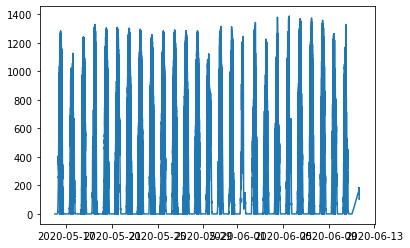

In [25]:
# get plant 1 AC POWER data in order and plot it
data = train_df[train_df['PLANT_ID'] == 4136001].set_index('DATE_TIME').sort_values(by='DATE_TIME')['AC_POWER']
plt.plot(data)


In [28]:
model = SimpleExpSmoothing(data)
fit1 = model.fit()

C:\Users\slin2\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\slin2\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [29]:
fit1.forecast(9)

C:\Users\slin2\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


50940    130.549954
50941    130.549954
50942    130.549954
50943    130.549954
50944    130.549954
50945    130.549954
50946    130.549954
50947    130.549954
50948    130.549954
dtype: float64